<a href="https://colab.research.google.com/github/palabebek/Machine-Learning/blob/main/Week%207/Boosting_and_Bagging_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HeartDisease

c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Akurasi: 0.5409836065573771


c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Presisi: 0.33285714285714285
Recall: 0.321127531472359
F1-score: 0.3039040616246499


c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.8000643423640572


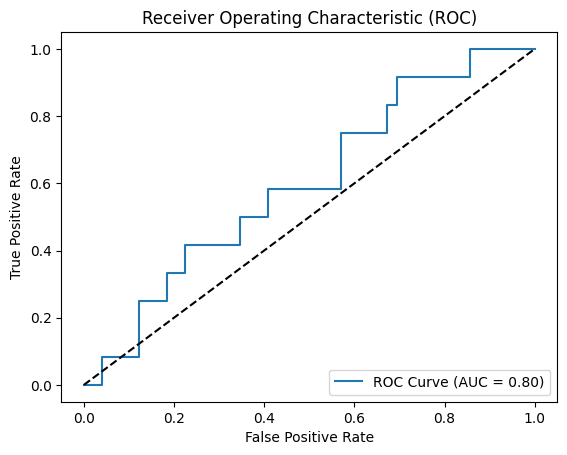

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer


# Muat data
data = pd.read_csv(r'C:\Users\Infinix X2\Documents\SEMESTER 8\Machine Learning\Week 1\HeartDisease.csv')

# Pilih fitur dan target
features = data.drop('num', axis=1).select_dtypes(include=np.number) # Hanya fitur numerik
target = data['num']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression(max_iter=1000) # Tambahkan max_iter untuk konvergensi
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif
features = data.drop('num', axis=1).select_dtypes(include=np.number) # Hanya fitur numerik
target = data['num']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression(max_iter=1000) # Tambahkan max_iter untuk konvergensi
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif

from sklearn.multiclass import OneVsRestClassifier

# Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Hitung Presisi
precision = precision_score(y_test, y_pred, average='macro')
print("Presisi:", precision)

# Hitung Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Hitung F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

# Hitung AUC
classifier = OneVsRestClassifier(model)
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("AUC:", auc)

# Hitung dan plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

# Boosting: Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)

# Bagging: Random Forest Classifier
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

# Evaluate Boosting
print("Boosting Classification Report:")
print(classification_report(y_test, boosting_pred))

# Evaluate Bagging
print("Bagging Classification Report:")
print(classification_report(y_test, bagging_pred))

Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.17      0.17      0.17        12
           2       0.00      0.00      0.00         9
           3       0.33      0.14      0.20         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.24      0.25      0.23        61
weighted avg       0.41      0.49      0.44        61

Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg  

c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# **Citarum Water**


Data Head:
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  

Columns: Index(['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO',
       'BOD', 'COD

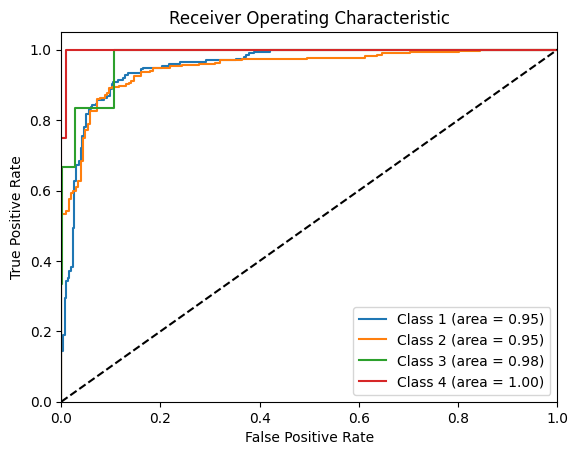

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = r"C:\Users\Infinix X2\Documents\SEMESTER 8\Machine Learning\Week 2\CitarumWater.csv"  # Sesuaikan jika perlu
data = pd.read_csv(file_path)
print("Data Head:")
print(data.head())
print("\nColumns:", data.columns)
print("\nMissing Values:", data.isnull().sum())



# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc_score:.4f}')


# Plot ROC curve for each class
plt.figure()
n_classes = len(model.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=model.classes_[i])
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {roc_auc_score(y_test == model.classes_[i], y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

from IPython.display import display, Math

# Explanation of mathematical equations
# Logistic Regression Equation
display(Math(r'h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}'))

# Accuracy
display(Math(r'Accuracy = \frac{TP + TN}{TP + TN + FP + FN}'))

# Precision
display(Math(r'Precision = \frac{TP}{TP + FP}'))

# Recall
display(Math(r'Recall = \frac{TP}{TP + FN}'))

# F1 Score
display(Math(r'F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}'))

# AUC
display(Math(r'AUC = \int_{0}^{1} TPR \, d(FPR)'))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

# Boosting: Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)

# Bagging: Random Forest Classifier
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

# Evaluate Boosting
print("Boosting Classification Report:")
print(classification_report(y_test, boosting_pred))

# Evaluate Bagging
print("Bagging Classification Report:")
print(classification_report(y_test, bagging_pred))

Boosting Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       196
           2       1.00      1.00      1.00       294
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Bagging Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       196
           2       0.99      1.00      1.00       294
           3       0.83      0.83      0.83         6
           4       1.00      0.75      0.86         4

    accuracy                           0.99       500
   macro avg       0.96      0.89      0.92       500
weighted avg       0.99      0.99      0.99       500



# Income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Accuracy (Decision Tree): 0.5138057742782153
              precision    recall  f1-score     

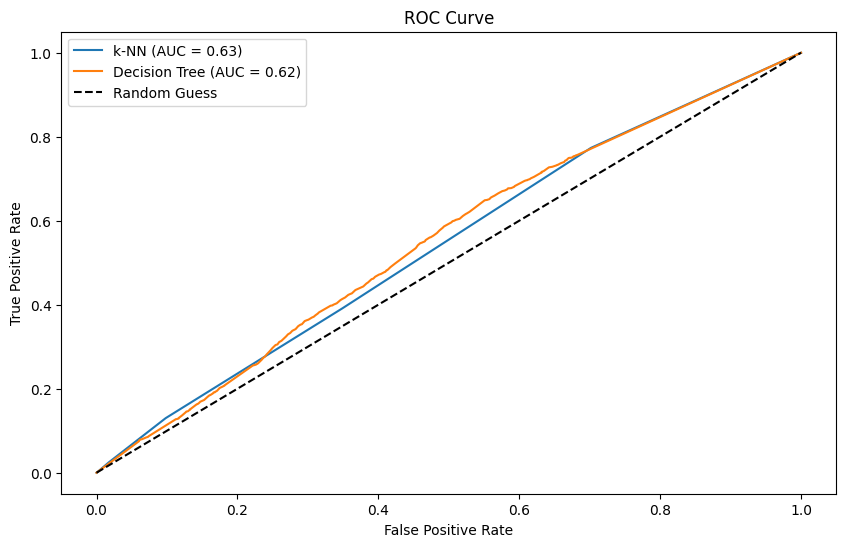

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Infinix X2\Documents\SEMESTER 8\Machine Learning\Week 3\income.csv')  # Ensure the file is in the same directory as the notebook
df.head()

df.info()

df.describe()

from sklearn.tree import DecisionTreeClassifier

# Build Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_test = y_test[:len(y_pred_dt)]  # Ensure y_test matches the length of y_pred_dt

# Evaluation
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
# Display classification report in tabular format
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()
print(report_dt_df)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing
df = df.dropna()  # Menghapus baris dengan nilai NaN
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])  # Encode target variable (income)

# Features and target
X = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']]
y = df['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
# Display classification report in tabular format
report = classification_report(y_test, y_pred, output_dict=True)
report_knn = pd.DataFrame(report).transpose()
print(report_knn)

from sklearn.metrics import roc_auc_score, roc_curve

# Akurasi
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Presisi, Recall, F1-score (sudah dihitung sebelumnya dalam classification_report)
precision_knn = report_knn.loc['weighted avg', 'precision']
recall_knn = report_knn.loc['weighted avg', 'recall']
f1_knn = report_knn.loc['weighted avg', 'f1-score']

precision_dt = report_dt_df.loc['weighted avg', 'precision']
recall_dt = report_dt_df.loc['weighted avg', 'recall']
f1_dt = report_dt_df.loc['weighted avg', 'f1-score']

# AUC
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')

# ROC Curve (contoh untuk kelas tertentu, misalnya kelas 1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1], pos_label=1)

# Menampilkan hasil
print("Metrik Evaluasi k-NN:")
print(f"Akurasi: {accuracy_knn}")
print(f"Presisi: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print(f"AUC: {auc_knn}")

print("\nMetrik Evaluasi Decision Tree:")
print(f"Akurasi: {accuracy_dt}")
print(f"Presisi: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")
print(f"AUC: {auc_dt}")

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

# Boosting: Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)

# Bagging: Random Forest Classifier
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

# Evaluate Boosting
print("Boosting Classification Report:")
print(classification_report(y_test, boosting_pred))

# Evaluate Bagging
print("Bagging Classification Report:")
print(classification_report(y_test, bagging_pred))

Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.96      0.72      4924
           1       0.20      0.00      0.00      2246
           2       0.55      0.46      0.50      1617
           3       0.23      0.00      0.01       738

    accuracy                           0.57      9525
   macro avg       0.39      0.36      0.31      9525
weighted avg       0.46      0.57      0.46      9525

Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68      4924
           1       0.24      0.09      0.14      2246
           2       0.46      0.37      0.41      1617
           3       0.21      0.10      0.13       738

    accuracy                           0.52      9525
   macro avg       0.37      0.35      0.34      9525
weighted avg       0.45      0.52      0.46      9525

